In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,KBinsDiscretizer, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/train.csv', index_col=0, parse_dates=True)

In [4]:
df.shape

(10886, 11)

In [12]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [13]:
df.head(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8


In [14]:
df.tail(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2012-12-19 14:00:00,4,0,1,1,17.22,21.210,50,12.9980,33,185,218
2012-12-19 15:00:00,4,0,1,1,17.22,21.210,50,19.0012,28,209,237
2012-12-19 16:00:00,4,0,1,1,17.22,21.210,50,23.9994,37,297,334
2012-12-19 17:00:00,4,0,1,1,16.40,20.455,50,26.0027,26,536,562
2012-12-19 18:00:00,4,0,1,1,15.58,19.695,50,23.9994,23,546,569
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [15]:
df.isna().sum() # check for missing values

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [16]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [17]:
df.index

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-12-19 14:00:00', '2012-12-19 15:00:00',
               '2012-12-19 16:00:00', '2012-12-19 17:00:00',
               '2012-12-19 18:00:00', '2012-12-19 19:00:00',
               '2012-12-19 20:00:00', '2012-12-19 21:00:00',
               '2012-12-19 22:00:00', '2012-12-19 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=10886, freq=None)

<AxesSubplot:>

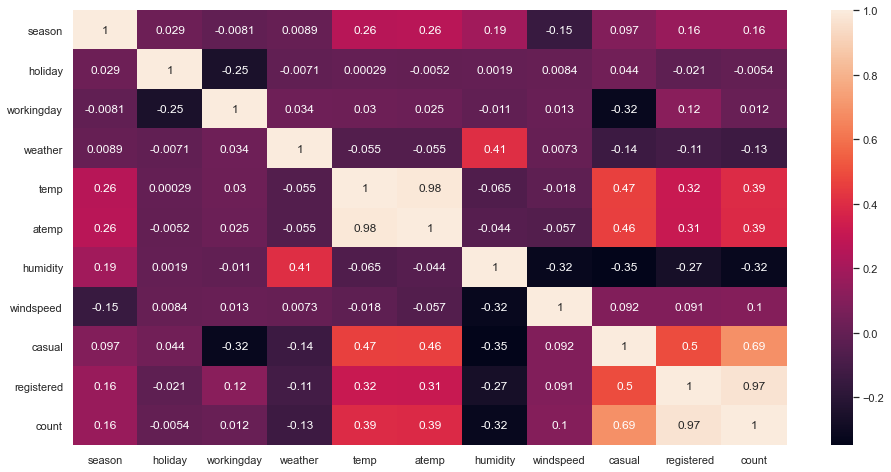

In [18]:
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df.corr(), annot=True)


In [19]:
df ['year'] = df.index.year
df ['month'] = df.index.month
df ['day'] = df.index.day
df ['hour'] = df.index.hour
df ['minute'] = df.index.minute

In [20]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0


In [22]:
 # Assign X and y values
y = df['count']
X = df[['weather', 'temp', 'humidity', 'windspeed','year','month','day','hour','minute']]

In [23]:
# Split the DataFrame into X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
X_train.shape

(8708, 9)

In [25]:
X_test.shape

(2178, 9)

In [26]:
y_train.shape 

(8708,)

In [27]:
y_test.shape

(2178,)

In [28]:
m = LinearRegression() #instantiate

In [29]:
m.fit(X_train, y_train)

LinearRegression()

In [30]:
m.score(X_train, y_train) #training-score  

0.38287079833369353

In [31]:
# get labels
m.predict(X_train)

array([220.26932439, 300.63911164, 237.19706368, ..., 310.16418387,
       298.20990682, 137.61691182])

In [103]:
train_accuracy

0.6965493219624757

In [32]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0


# Exploratory Data Analysis 

In [33]:
# feature engineering check, used new name dataframe to play with data without touching my original dataframe
EDA_DF= df.copy()

In [34]:
EDA_DF.head(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5,0
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011,1,1,6,0
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011,1,1,7,0
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,2011,1,1,8,0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='year', ylabel='count'>

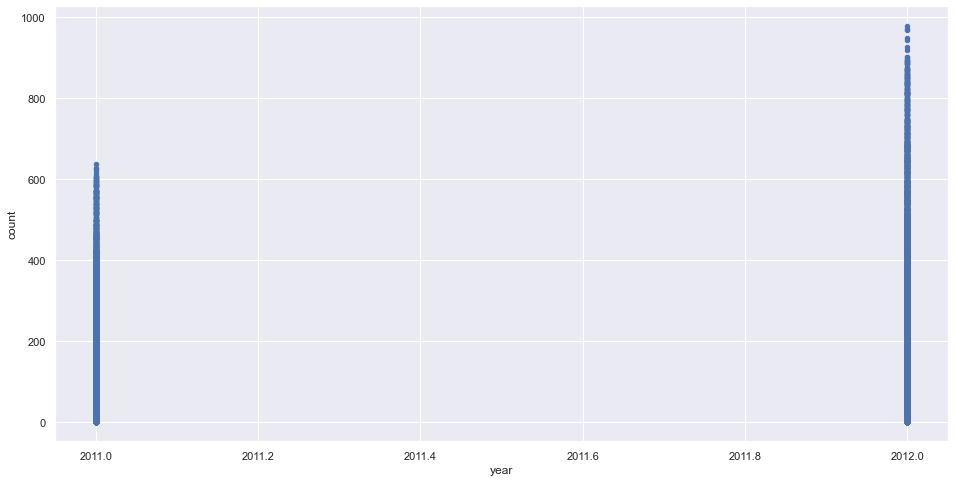

In [35]:
# Exploratory plot to view the data for each col vs count
EDA_DF.plot.scatter(x= 'year', y='count')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='weather', ylabel='count'>

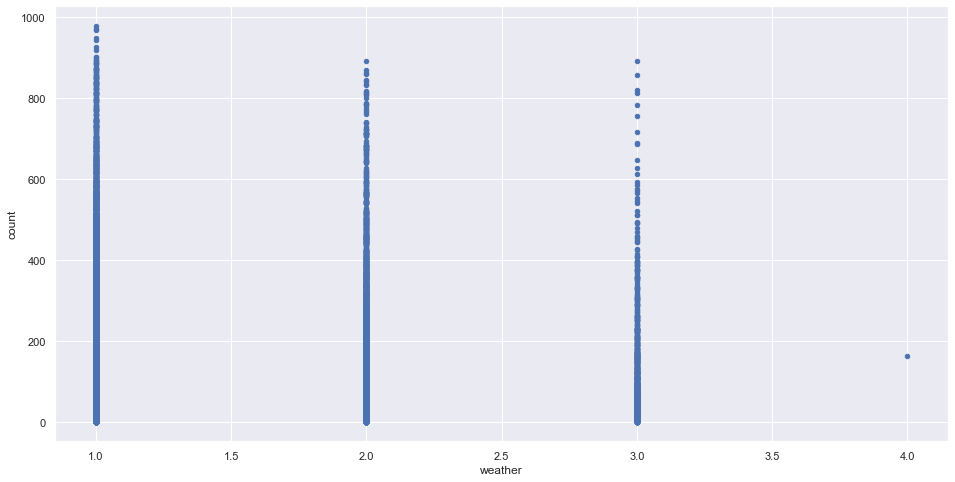

In [36]:
EDA_DF.plot.scatter(x= 'weather', y='count')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='temp', ylabel='count'>

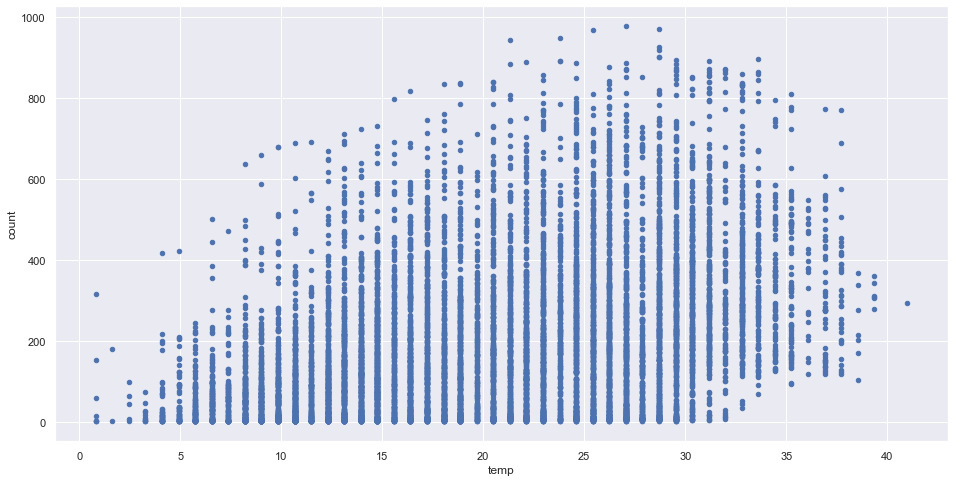

In [37]:
EDA_DF.plot.scatter(x= 'temp', y='count')


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='humidity', ylabel='count'>

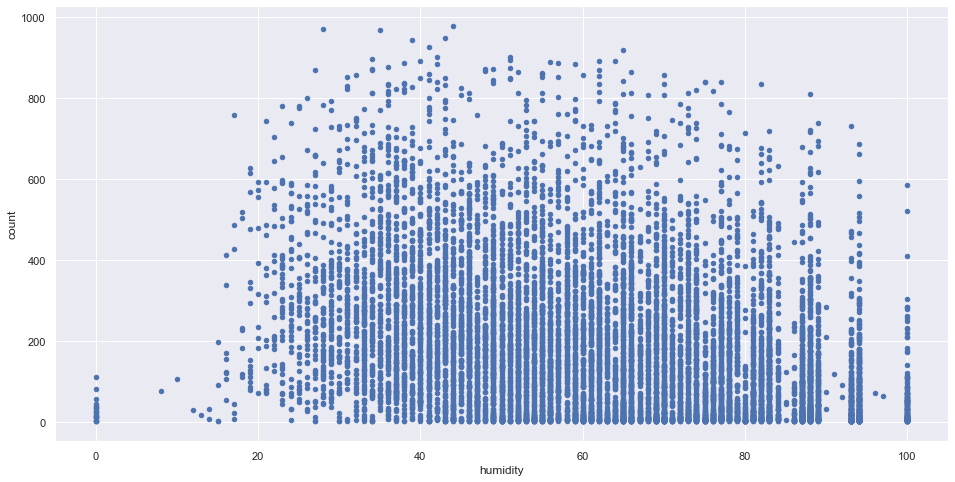

In [38]:
EDA_DF.plot.scatter(x= 'humidity', y='count')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='windspeed', ylabel='count'>

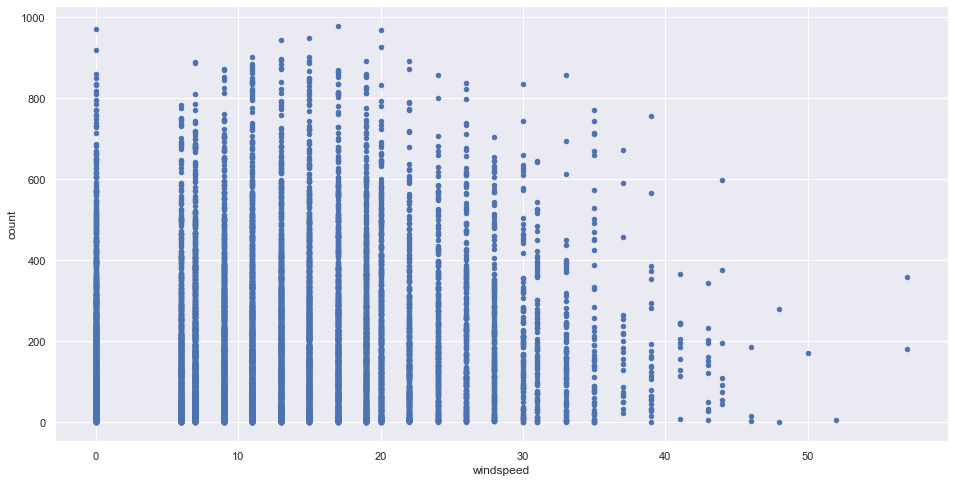

In [39]:
EDA_DF.plot.scatter(x= 'windspeed', y='count')

<AxesSubplot:>

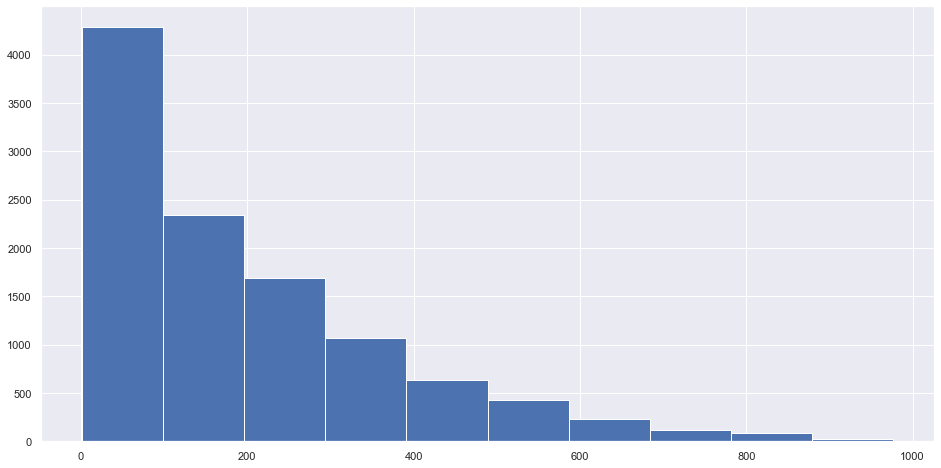

In [40]:
EDA_DF['count'].hist()

<AxesSubplot:>

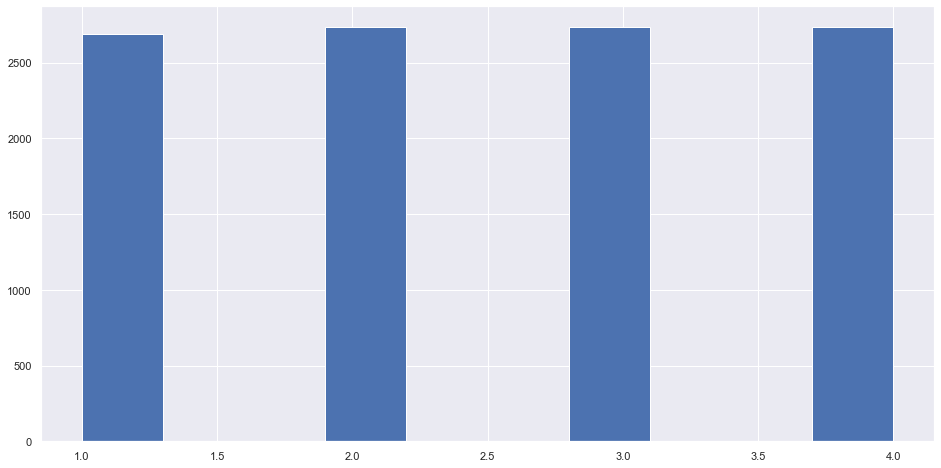

In [41]:
EDA_DF['season'].hist()

<AxesSubplot:>

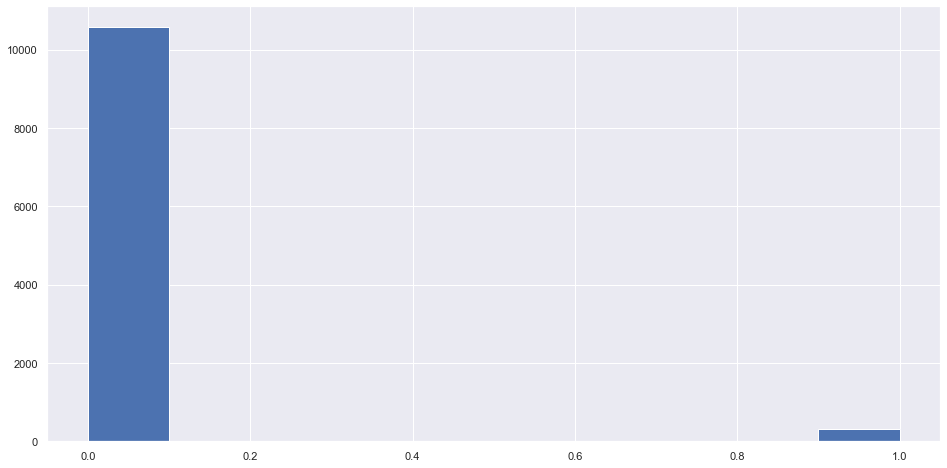

In [43]:
EDA_DF['holiday'].hist()

<AxesSubplot:>

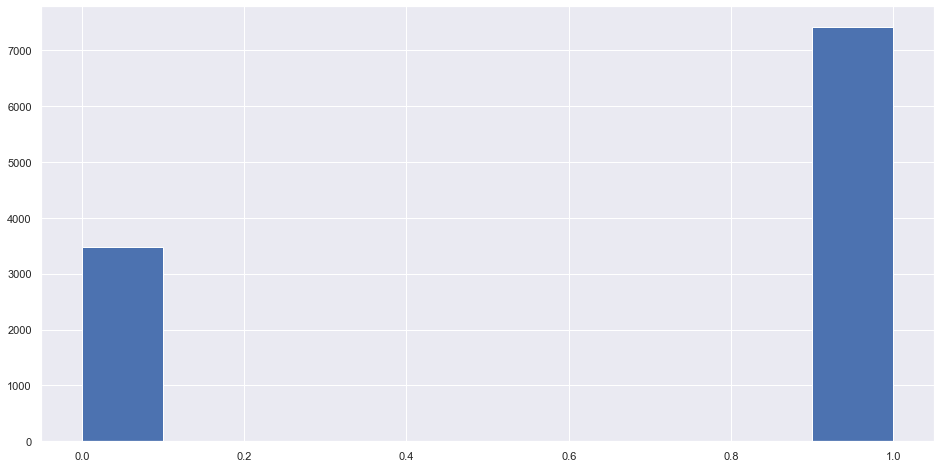

In [44]:
EDA_DF['workingday'].hist()

<AxesSubplot:>

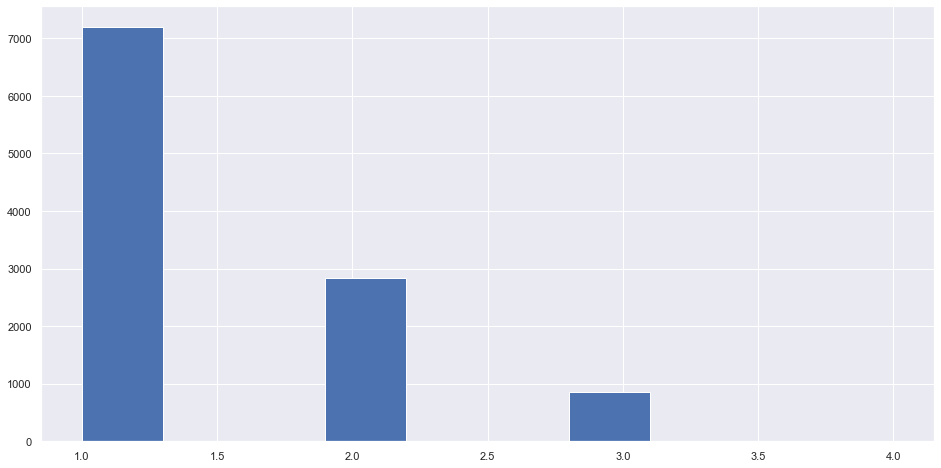

In [45]:
EDA_DF['weather'].hist()        

<AxesSubplot:>

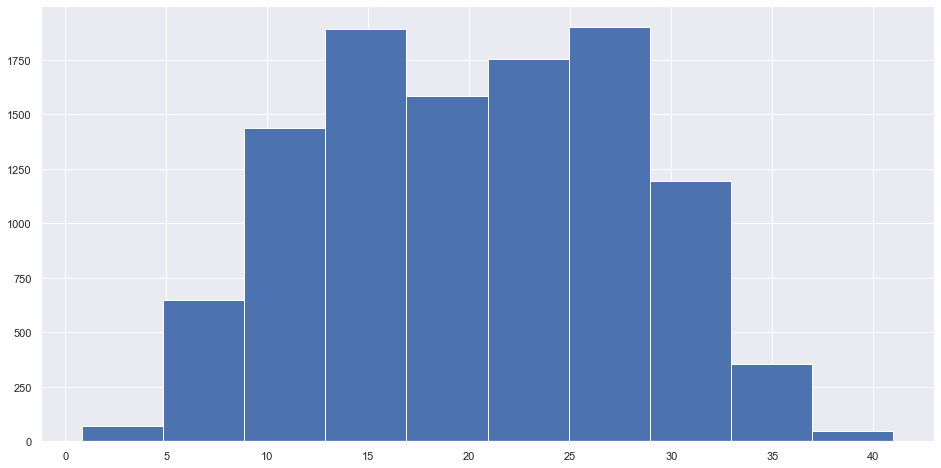

In [46]:
EDA_DF['temp'].hist()    

<AxesSubplot:>

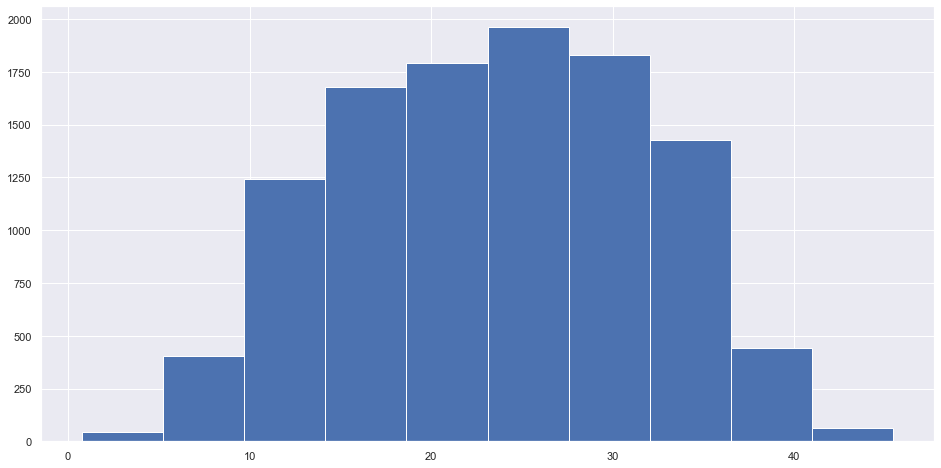

In [47]:
EDA_DF['atemp'].hist()

<AxesSubplot:>

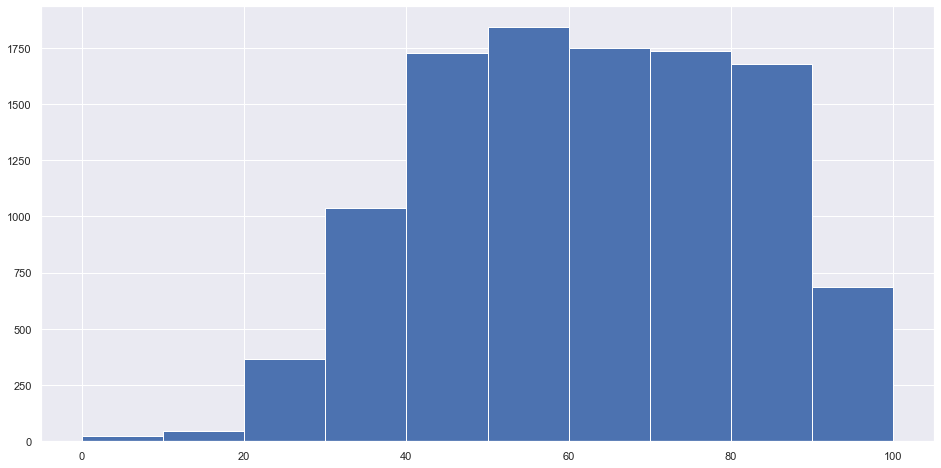

In [48]:
EDA_DF['humidity'].hist()   

<AxesSubplot:>

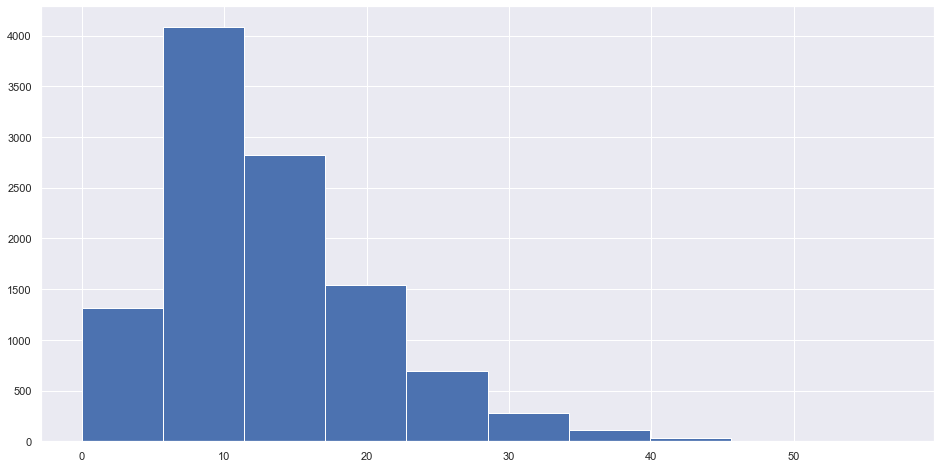

In [49]:
 EDA_DF['windspeed'].hist()  

Text(0.5, 1.0, 'Frequency of Bike hires')

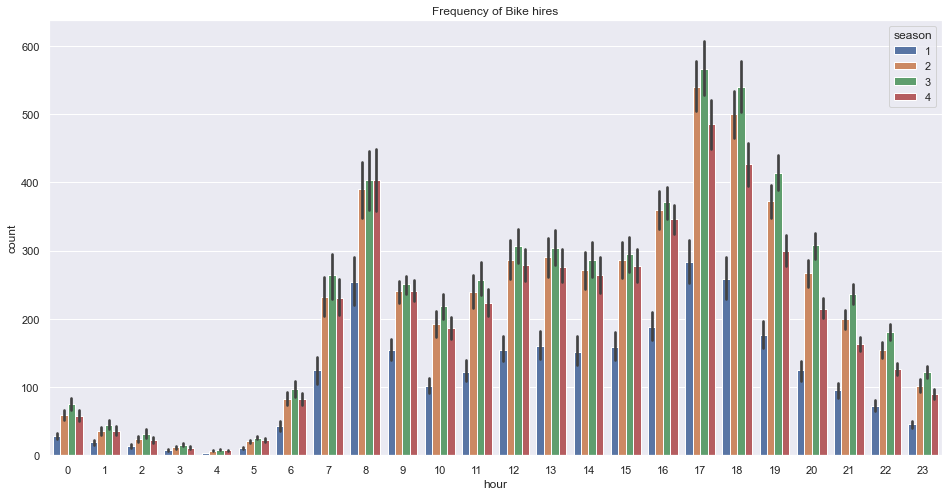

In [50]:
sns.barplot(data=EDA_DF, x='hour', y='count', hue='season')
sns.set(rc = {'figure.figsize':(16,8)})
plt.title('Frequency of Bike hires')

# Feature Engineering

In [51]:
ohc = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohc.fit(X_train[['month','day','hour','minute']])
onehot_mix_set = ohc.transform(X_train[['month','day','hour','minute']])
onehot_mix_set = pd.DataFrame (onehot_mix_set)
onehot_mix_set.head()


,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [52]:
k = KBinsDiscretizer(n_bins=5, encode='onehot', strategy='quantile')
k.fit(X_train[['temp']])
bins = k.transform(X_train[['temp']])
bins = pd.DataFrame(bins.todense())
bins.head()

,0,1,2,3,4
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0


In [53]:
X_train.reset_index(inplace=True)
unmodified = X_train[['weather', 'temp', 'humidity', 'windspeed','year','month','day','hour','minute']]

In [54]:
unmodified.head() # drop feature engineered cols

,weather,temp,humidity,windspeed,year,month,day,hour,minute
0,1,20.50,63,6.0032,2011,12,5,16,0
1,2,31.16,58,19.0012,2012,7,19,9,0
2,1,27.06,36,8.9981,2011,6,4,11,0
3,1,32.80,22,32.9975,2011,6,2,16,0
4,1,26.24,57,11.0014,2012,6,15,10,0


In [55]:
unmodified2 = unmodified.copy() #unmodified.drop('temp', axis=1, inplace=True) 

In [56]:
unmodified2.columns

Index(['weather', 'temp', 'humidity', 'windspeed', 'year', 'month', 'day',
       'hour', 'minute'],
      dtype='object')

In [57]:
unmodified2.drop('temp',axis=1, inplace=True)
unmodified2.drop('month',axis=1, inplace=True) 
unmodified2.drop('day', axis=1, inplace=True)
unmodified2.drop('hour', axis=1, inplace=True)
unmodified2.drop('minute',axis=1, inplace=True)
#unmodifed2.drop(['temp','month','day','hour','minute'], axis=1, inplace=True)
#unmodifed2.drop('temp','month','day','hour','minute', axis=1, inplace=True)

In [58]:
unmodified2

,weather,humidity,windspeed,year
0,1,63,6.0032,2011
1,2,58,19.0012,2012
2,1,36,8.9981,2011
3,1,22,32.9975,2011
4,1,57,11.0014,2012
...,...,...,...,...
8703,1,53,12.9980,2012
8704,1,75,0.0000,2011
8705,1,57,19.9995,2012
8706,1,50,8.9981,2011


In [59]:
onehot_mix_set

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8705,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8706,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [60]:
bins

,0,1,2,3,4
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
8703,0.0,1.0,0.0,0.0,0.0
8704,1.0,0.0,0.0,0.0,0.0
8705,0.0,0.0,0.0,1.0,0.0
8706,0.0,0.0,0.0,1.0,0.0


In [61]:
onehot_mix_set.shape, bins.shape, unmodified2.shape

((8708, 56), (8708, 5), (8708, 4))

In [62]:
merge_first = pd.merge(left=unmodified2, right=onehot_mix_set, how='outer', left_index=True, right_index=True)
merge_second = pd.merge(left=merge_first, right=bins, how='outer', left_index=True, right_index=True)

In [63]:
merge_second

,weather,humidity,windspeed,year,0_x,1_x,2_x,3_x,4_x,5,...,51,52,53,54,55,0_y,1_y,2_y,3_y,4_y
0,1,63,6.0032,2011,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,2,58,19.0012,2012,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,36,8.9981,2011,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,22,32.9975,2011,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1,57,11.0014,2012,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,1,53,12.9980,2012,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
8704,1,75,0.0000,2011,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
8705,1,57,19.9995,2012,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8706,1,50,8.9981,2011,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [64]:
X_train_fe = merge_second  
X_train_fe.shape

(8708, 65)

In [65]:
scaler = MinMaxScaler()  
scaler.fit(X_train_fe)
X_train_scaled = scaler.transform(X_train_fe) 

In [66]:
pd.DataFrame(X_train_scaled).head(10)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.000000,0.63,0.105325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.333333,0.58,0.333373,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000000,0.36,0.157870,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000000,0.22,0.578935,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.57,0.193018,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.333333,0.69,0.263195,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.333333,0.94,0.122840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.333333,0.94,0.157870,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.666667,0.83,0.228047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.000000,0.43,0.228047,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [67]:
m = LinearRegression()
m.fit(X_train_scaled, y_train)

LinearRegression()

In [68]:
train_accuracy = m.score(X_train_scaled, y_train)
train_accuracy

0.6965493219624757

In [69]:
test_ohc = ohc.transform(X_test[['month','day','hour','minute']])
test_ohc = pd.DataFrame(test_ohc)
test_ohc.shape,


((2178, 56),)

In [70]:
test_bins = k.transform(X_test[['temp']])
test_bins = pd.DataFrame(test_bins.todense())
test_bins.shape


(2178, 5)

In [71]:
X_test.reset_index(inplace=True)
unmodified_test = X_test[['weather', 'temp', 'humidity', 'windspeed','year','month','day','hour','minute']]

In [72]:
unmodified_test.head()

,weather,temp,humidity,windspeed,year,month,day,hour,minute
0,1,31.16,52,19.0012,2012,8,17,11,0
1,1,10.66,65,7.0015,2011,3,14,0,0
2,2,22.14,68,12.9980,2012,5,13,4,0
3,2,12.30,75,6.0032,2011,11,6,9,0
4,1,6.56,40,36.9974,2012,2,12,15,0


In [73]:
unmodified_test_2 = unmodified_test.copy()

In [74]:
unmodified_test_2.columns

Index(['weather', 'temp', 'humidity', 'windspeed', 'year', 'month', 'day',
       'hour', 'minute'],
      dtype='object')

In [75]:
unmodified_test_2.drop('temp',axis=1, inplace=True)
unmodified_test_2.drop('month',axis=1, inplace=True) 
unmodified_test_2.drop('day', axis=1, inplace=True)
unmodified_test_2.drop('hour', axis=1, inplace=True)
unmodified_test_2.drop('minute',axis=1, inplace=True)

In [76]:
test_ohc.shape, test_bins.shape, unmodified_test_2.shape

((2178, 56), (2178, 5), (2178, 4))

In [77]:
merge_first_test = pd.merge(left=unmodified_test_2, right=test_ohc, how='outer', left_index=True, right_index=True)
merge_second_test = pd.merge(left=merge_first_test, right=test_bins, how='outer', left_index=True, right_index=True)

In [78]:
merge_second_test

,weather,humidity,windspeed,year,0_x,1_x,2_x,3_x,4_x,5,...,51,52,53,54,55,0_y,1_y,2_y,3_y,4_y
0,1,52,19.0012,2012,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,65,7.0015,2011,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,2,68,12.9980,2012,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,2,75,6.0032,2011,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,1,40,36.9974,2012,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,1,75,8.9981,2011,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2174,3,52,23.9994,2012,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2175,1,64,11.0014,2011,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2176,2,55,16.9979,2011,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [79]:
X_test_fe = merge_second_test  
X_test_fe.shape

(2178, 65)

In [80]:
X_test_scaled = scaler.transform(X_test_fe) 
X_test_scaled.shape


(2178, 65)

In [99]:
X_test_scaled.shape

(2178, 65)

In [81]:
pd.DataFrame(X_test_scaled).head(10)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.000000,0.52,0.333373,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000000,0.65,0.122840,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.333333,0.68,0.228047,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.333333,0.75,0.105325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.000000,0.40,0.649112,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.000000,0.50,0.298225,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.000000,0.52,0.122840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,0.000000,0.70,0.122840,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.000000,0.39,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.000000,0.26,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [82]:
train_accuracy

0.6965493219624757

In [83]:
test_accuracy = m.score(X_test_scaled, y_test)
test_accuracy

0.687548255212855

# Random Forest Regressor

In [84]:
rf = RandomForestRegressor(max_depth=5, random_state=0)

In [85]:
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=5, random_state=0)

In [86]:
X_train_scaled_df = pd.DataFrame(X_train_scaled)

In [87]:
pd.DataFrame({'importance': rf.feature_importances_, 'feature': X_train_scaled_df.columns}).\
sort_values('importance', ascending=False)

,importance,feature
52,0.203875,52
53,0.184620,53
43,0.124765,43
3,0.122936,3
64,0.116385,64
...,...,...
46,0.000000,46
45,0.000000,45
36,0.000000,36
37,0.000000,37
